В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
cars_df = pd.read_csv('cars.csv')
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

Signature:
pd.DataFrame.info(
    self,
    verbose: 'bool | None' = None,
    buf: 'WriteBuffer[str] | None' = None,
    max_cols: 'int | None' = None,
    memory_usage: 'bool | str | None' = None,
    show_counts: 'bool | None' = None,
) -> 'None'
Docstring:
Print a concise summary of a DataFrame.

This method prints information about a DataFrame including
the index dtype and columns, non-null values and memory usage.

Parameters
----------
verbose : bool, optional
    Whether to print the full summary. By default, the setting in
    ``pandas.options.display.max_info_columns`` is followed.
buf : writable buffer, defaults to sys.stdout
    Where to send the output. By default, the output is printed to
    sys.stdout. Pass a writable buffer if you need to further process
    the output.
max_cols : int, optional
    When to switch from the verbose to the truncated output. If the
    DataFrame has more than `max_cols` columns, the truncated output
    is used. By default, the setting in


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [5]:
cars_df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [6]:
cars_df['Fuel_Type'].unique()

array(['Petrol', 'Diesel'], dtype=object)

In [7]:
cars_df['Owner_Type'].unique()

array(['First', 'Second', 'Third'], dtype=object)

In [8]:
cars_df['Brand'].unique()

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)

In [9]:
cars_df['Model'].unique()

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

В наборі даних 8 числивих та 5 категоріальних колонок:
- 3 бінарні
- 1 мультикатегоріальна
- 1 колонка в якій можна встановити відношення порядку

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [10]:
X = cars_df.drop('Price', axis=1) 
y = cars_df['Price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [11]:
cars_df['Fuel_Type'].describe()

count        100
unique         2
top       Petrol
freq          52
Name: Fuel_Type, dtype: object

In [12]:
cars_df['Transmission'].describe()

count           100
unique            2
top       Automatic
freq             57
Name: Transmission, dtype: object

In [13]:
fuel_codes = {'Diesel': 0, 'Petrol': 1}
transmission_codes = {'Manual':0, 'Automatic': 1}
cars_df['fuel_code'] = cars_df.Fuel_Type.map(fuel_codes)
cars_df['transmission_code'] = cars_df.Transmission.map(transmission_codes)

In [14]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,fuel_code,transmission_code
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,1,0
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,1,1
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000,1,1
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000,0,0
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000,0,1


In [15]:
encoder = OneHotEncoder()
encoder.fit(X_train[['Brand']])
encoder.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [16]:
train_one_hot = encoder.transform(X_train[['Brand']]).toarray()
test_one_hot = encoder.transform(X_test[['Brand']]).toarray()

In [17]:
X_train[encoder.categories_[0]] = train_one_hot
X_test[encoder.categories_[0]] = test_one_hot

In [18]:
X_train['fuel_code'] = X_train.Fuel_Type.map(fuel_codes)
X_train['transmission_code'] = X_train.Transmission.map(transmission_codes)
X_test['fuel_code'] = X_test.Fuel_Type.map(fuel_codes)
X_test['transmission_code'] = X_test.Transmission.map(transmission_codes)

In [19]:
X_train.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,fuel_code,transmission_code
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1


In [20]:
X_test.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,fuel_code,transmission_code
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [21]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [22]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,fuel_code,transmission_code,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,fuel_code,transmission_code,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2.0


(None, None)

Дані у колонці Model згрупую за п'ятьма категоріями (хетчбек, седан, кросовер, преміум авто та інші). Після цього застосую OneHotEncoder для кодування.

In [23]:
cars_df['Model'].describe()

count         100
unique         58
top       Mustang
freq            3
Name: Model, dtype: object

In [24]:
def simplify_model(model):
    model = model.lower()
    if model in ['swift', 'polo', 'altroz', 'tiago', 'santro', 'tigor', 's-cross', 'wr-v', 'br-v']:
        return 'Hatchback'
    elif model in ['city', 'verna', 'ciaz', 'elantra', 'aspire', 'vento', 'a3', 'a4', 'a5', 'a6', '3 series', '5 series', 'c-class', 'e-class']:
        return 'Sedan'
    elif model in ['creta', 'harrier', 'nexon', 'scorpio', 'safari', 'ecosport', 'thar', 'xuv300', 'fortuner', 'venue',
                   'endeavour', 'glc', 'gle', 'gla', 'x1', 'x3', 'x5', 'q3', 'q5', 'q7', 'tiguan', 't-roc']:
        return 'SUV'
    elif model in ['mustang', 'camry', '7 series', 'passat'] or any(x in model for x in ['audi', 'bmw', 'mercedes']):
        return 'Luxury'
    else:
        return 'Other'

X_train['Model_Simplified'] = X_train['Model'].str.lower().apply(simplify_model)
X_test['Model_Simplified'] = X_test['Model'].str.lower().apply(simplify_model)

In [25]:
enc = OneHotEncoder()
enc.fit(X_train[['Model_Simplified']])
enc.categories_

[array(['Hatchback', 'Luxury', 'Other', 'SUV', 'Sedan'], dtype=object)]

In [26]:
train_one_hot = enc.transform(X_train[['Model_Simplified']]).toarray()
test_one_hot = enc.transform(X_test[['Model_Simplified']]).toarray()

In [27]:
X_train[enc.categories_[0]] = train_one_hot
X_test[enc.categories_[0]] = test_one_hot

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [28]:
X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])

In [29]:
X_train.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,fuel_code,transmission_code,Owner_Type_Codes,Hatchback,Luxury,Other,SUV,Sedan
83,84,2019,22000,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1.0,0.0,0.0,0.0,1.0,0.0
55,56,2018,28000,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
26,27,2018,28000,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1.0
54,55,2017,32000,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1.0,0.0,0.0,0.0,0.0,1.0
19,20,2017,26000,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1.0,0.0,0.0,0.0,1.0,0.0


In [30]:
train_df = pd.concat([X_train, y_train], axis=1)

In [31]:
train_df

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,fuel_code,transmission_code,Owner_Type_Codes,Hatchback,Luxury,Other,SUV,Sedan,Price
83,84,2019,22000,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,1600000
55,56,2018,28000,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,2600000
26,27,2018,28000,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1.0,3200000
54,55,2017,32000,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,650000
19,20,2017,26000,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,2500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,2020,30000,23,1248,74,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,2.0,1.0,0.0,0.0,0.0,0.0,600000
2,3,2017,20000,10,4951,395,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,2500000
6,7,2018,45000,15,2179,140,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,900000
27,28,2019,22000,18,1995,187,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,2800000


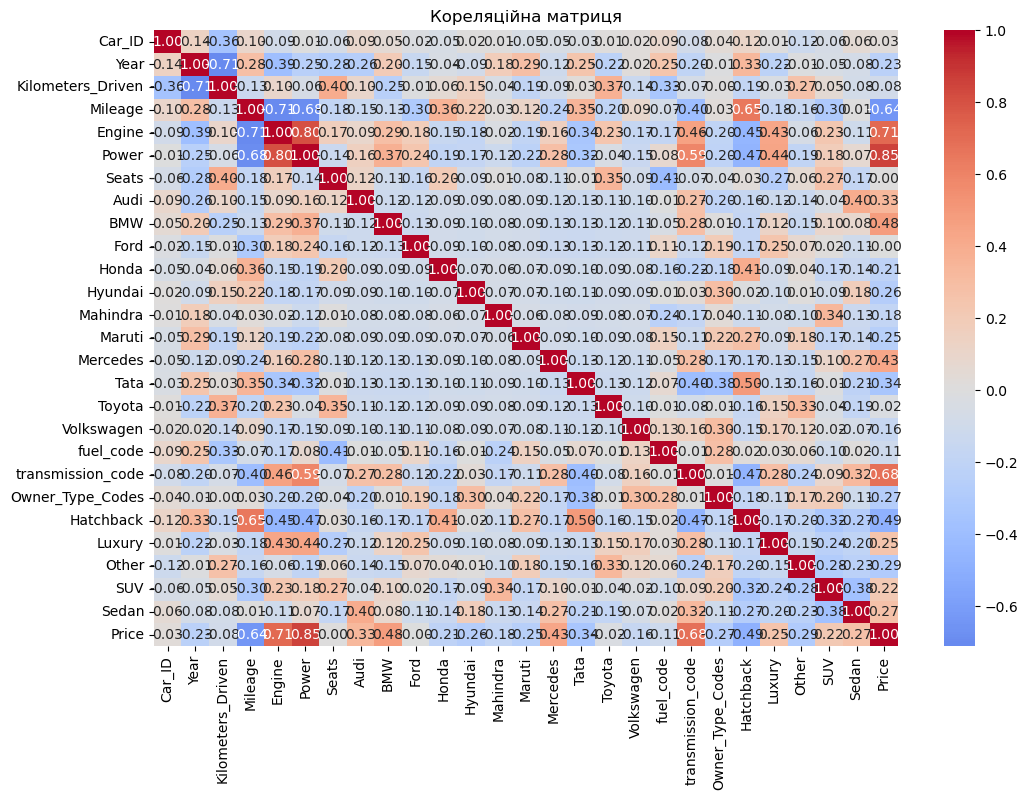

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title("Кореляційна матриця")
plt.show()

Добре корелюють такі колонки:
- price та power
- price та engine
- price та transmission_code
- hatchback та mileage
- transmission_code та power
- power та engine

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression().fit(X_train, y_train)

predictions = model.predict(X_train)
prediction_test = model.predict(X_test)

mse = mean_squared_error(y_train, predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 184682.3083737746


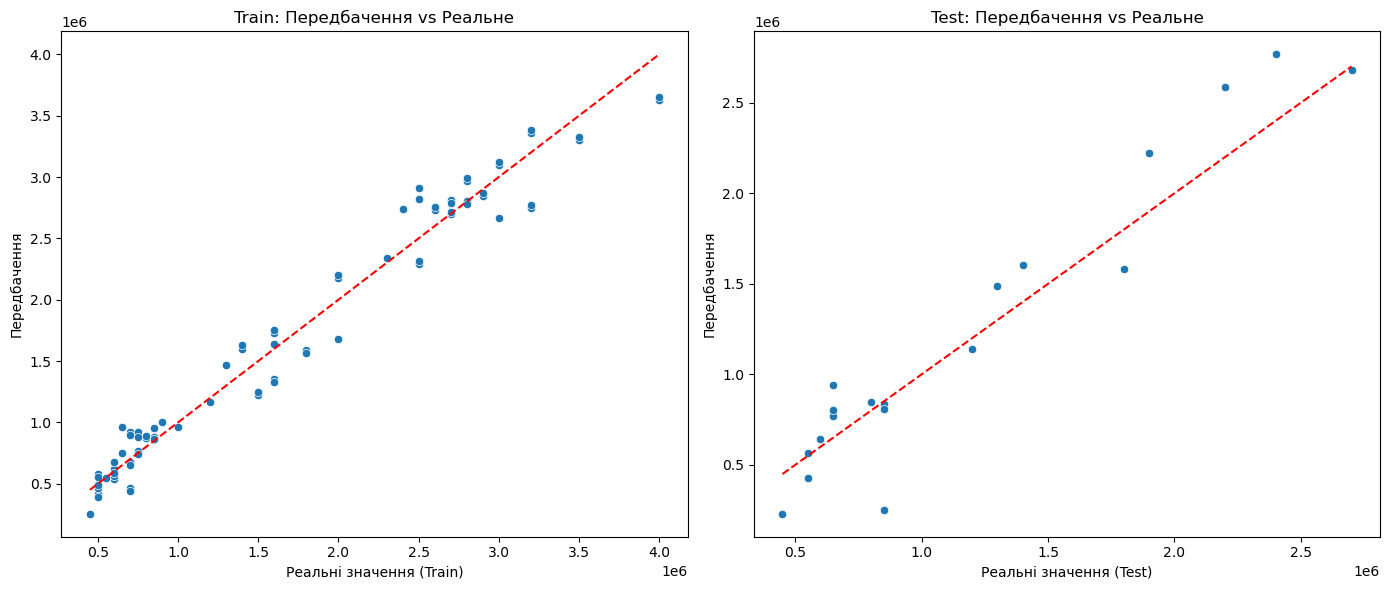

In [34]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=predictions)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.xlabel("Реальні значення (Train)")
plt.ylabel("Передбачення")
plt.title("Train: Передбачення vs Реальне")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=prediction_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Реальні значення (Test)")
plt.ylabel("Передбачення")
plt.title("Test: Передбачення vs Реальне")

plt.tight_layout()
plt.show()

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [35]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

scaler = StandardScaler()

scaler.fit(X_train[cols_to_scale])   

X_train_scaled = X_train.copy()
X_train_scaled[cols_to_scale] = scaler.transform(X_train[cols_to_scale])

X_test_scaled = X_test.copy()
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [36]:
model_1 = LinearRegression()
model_1.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
model_1.coef_

array([ 6.35327197e+02,  6.94819891e+04, -6.19163979e+03, -1.80909033e+05,
        6.92373780e+03,  4.23695054e+05, -3.80551305e+04,  7.69986204e+05,
        7.19137021e+05, -3.01924062e+05, -8.67422696e+04, -4.84372157e+05,
       -7.79656683e+05, -2.98149891e+05,  7.40539060e+05, -2.49447443e+05,
        1.51485102e+05, -1.80854881e+05, -3.54227003e+05,  1.51725280e+05,
        3.57565690e+04, -1.73362870e+04,  1.27944091e+05, -2.99981231e+05,
        1.27838614e+05,  6.15348133e+04])

In [38]:
coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': model.coef_
})

coef_df['Abs'] = coef_df['Coefficient'].abs()
coef_df.sort_values(by='Abs', ascending=False, inplace=True)

print(coef_df[['Feature', 'Coefficient']])

              Feature    Coefficient
12           Mahindra -779656.682617
7                Audi  769986.204083
14           Mercedes  740539.059671
8                 BMW  719137.020662
11            Hyundai -484372.156857
18          fuel_code -354227.003128
9                Ford -301924.061900
23              Other -299981.231123
13             Maruti -298149.890769
15               Tata -249447.443257
17         Volkswagen -180854.881047
19  transmission_code  151725.280060
16             Toyota  151485.101670
22             Luxury  127944.091293
24                SUV  127838.613507
10              Honda  -86742.269639
1                Year   61995.649697
25              Sedan   61534.813288
3             Mileage  -53039.974226
6               Seats  -51342.707738
20   Owner_Type_Codes   35756.569023
21          Hatchback  -17336.286965
5               Power    5203.611005
0              Car_ID     635.327197
4              Engine      10.543040
2   Kilometers_Driven      -0.675237


Позитивний вплив на цільову змінну мають колонки Audi, Mercedes та BMW (присутність цих брендів збільшує ціну автомобіля)

Негативний вплив на цільову змінну мають колонки Mahindra, Hyundai та fuel_code.

Mahindra, Hyundai — бюджетні марки, знижують ціну.

fuel_code — тип пального. Деякі типи (наприклад, дизель) знижують ціну.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [39]:
import statsmodels.api as sm

Y = y_train
X = X_train_scaled
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const                1.250948e+06
Car_ID               6.353272e+02
Year                 6.948199e+04
Kilometers_Driven   -6.191640e+03
Mileage             -1.809090e+05
Engine               6.923738e+03
Power                4.236951e+05
Seats               -3.805513e+04
Audi                 8.837088e+05
BMW                  8.328596e+05
Ford                -1.882015e+05
Honda                2.698028e+04
Hyundai             -3.706496e+05
Mahindra            -6.659341e+05
Maruti              -1.844273e+05
Mercedes             8.542616e+05
Tata                -1.357249e+05
Toyota               2.652077e+05
Volkswagen          -6.713233e+04
fuel_code           -3.542270e+05
transmission_code    1.517253e+05
Owner_Type_Codes     3.575657e+04
Hatchback            2.328533e+05
Luxury               3.781337e+05
Other               -4.979162e+04
SUV                  3.780282e+05
Sedan                3.117244e+05
dtype: float64

In [40]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     69.53
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           7.26e-33
Time:                        12:24:15   Log-Likelihood:                -1083.6
No. Observations:                  80   AIC:                             2217.
Df Residuals:                      55   BIC:                             2277.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.251e+06   7.77e+0

Mileage, Power, Audi, BMW, Hyundai, Mahindra, Mercedes, Toyota, fuel_code, Hatchback, Luxury, SUV, Sedan є стат значущими ознаками на рівні значущості 0.05

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [41]:
significant_features = [
    'Mileage', 'Power', 'Audi', 'BMW', 'Hyundai', 'Mahindra', 
    'Mercedes', 'Toyota', 'fuel_code', 'Hatchback', 
    'Luxury', 'SUV', 'Sedan'
]

X_significant = X_train_scaled[significant_features]
X_significant = sm.add_constant(X_significant)  
model_significant = sm.OLS(y_train, X_significant).fit()
print(model_significant.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           8.57e-41
Time:                        12:24:15   Log-Likelihood:                -1092.8
No. Observations:                  80   AIC:                             2214.
Df Residuals:                      66   BIC:                             2247.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.176e+06   8.87e+04     13.254      0.0

R² зменшився лише на 0.008, а Adj. R² — на 0.002, тобто майже не погіршився. Це свідчить, що видалені змінні майже не додавали корисної інформації, незважаючи на їхню наявність у моделі.

Модель стала простішою, без втрати якості. Спрощена модель з меншою кількістю змінних краща в сенсі інтерпретації та узагальнення на нові дані.

AIC і BIC зменшилися.

Спрощення моделі до лише статистично значущих змінних дозволило зберегти практично ту саму якість передбачення, зробивши її більш інтерпретованою та стійкою до перенавчання.


**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [42]:
sign_features = [
    'Mileage', 'Power', 'Audi', 'BMW', 'Hyundai', 'Mahindra', 'Maruti',
    'Mercedes', 'Toyota', 'fuel_code', 'transmission_code', 'Hatchback', 
    'Luxury', 'SUV', 'Sedan'
]

X_sign = X_train_scaled[significant_features]
X_sign = sm.add_constant(X_significant)  
model_sign = sm.OLS(y_train, X_significant).fit()
print(model_significant.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           8.57e-41
Time:                        12:24:16   Log-Likelihood:                -1092.8
No. Observations:                  80   AIC:                             2214.
Df Residuals:                      66   BIC:                             2247.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.176e+06   8.87e+04     13.254      0.0

Значення R2  збільшилось на 0.008, в той час як Adj. R-squared зменшилось на 0.002, що свідчить про те, що модель краще запам'ятала тестові дані, але не стала кращою

З останніх трьох завдань я би обрала 9